# __Classification__

    This notebook tests the different performances of classification algorithms on a standard dataset called Social Network Advertisements that specifies if customers bought a particular product or not.

#### __Import Libraries__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

#### __Load Datasets__

In [2]:
data = pd.read_csv("./data/Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### __Dataset Information__

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


#### __Correlation Matrix__

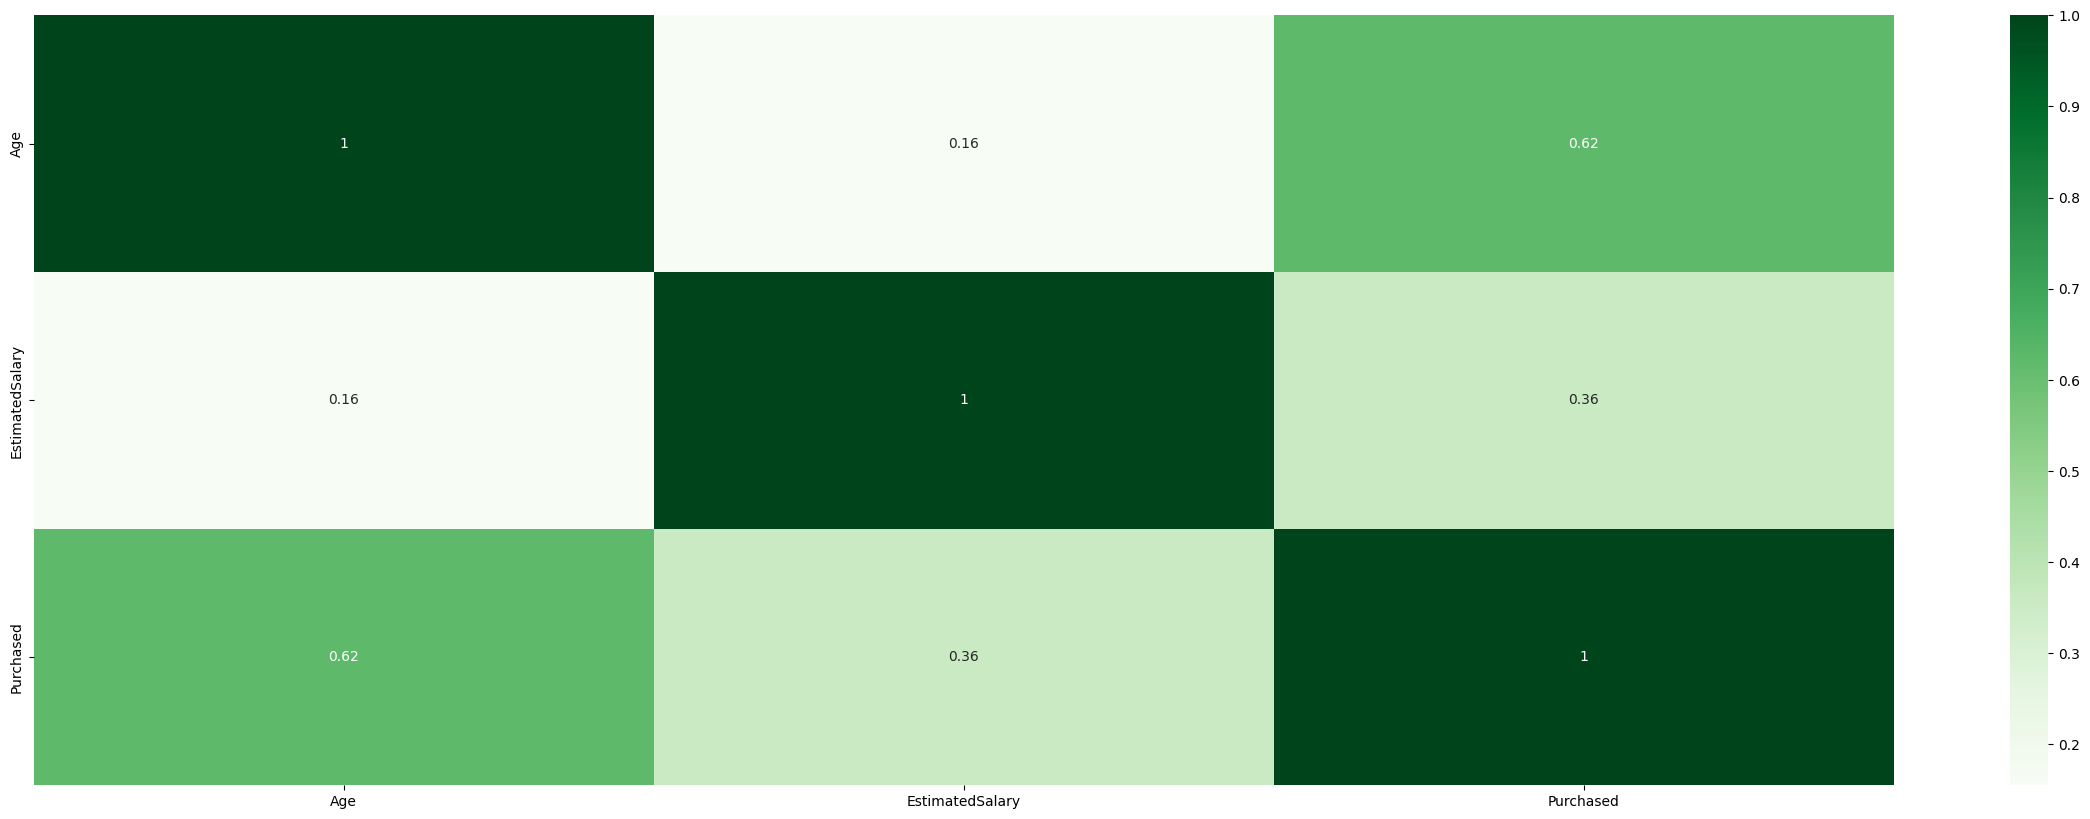

In [4]:
corr = data.corr()
plt.figure(figsize = (30 ,10))
sns.heatmap(corr, cmap="Greens", annot=True)
plt.show()

#### __Correlation Scores with the inference column__

In [8]:
cor = data.corr()
cor.nlargest(3,'Purchased')['Purchased']

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Name: Purchased, dtype: float64

#### __Splitting the dataset into Training and Test sets__

In [6]:
X = pd.DataFrame(data.loc[:, "Age":"EstimatedSalary"])
Y = pd.DataFrame(data.loc[:, "Purchased"])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, random_state = 6497)

#### __Feature Scaling__


In [7]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### __*Logistic Regression*__

In [8]:
l_reg = LogisticRegression(random_state = 6497)

l_reg.fit(X_train, Y_train.values.ravel())
predict = l_reg.predict(X_test)

In [9]:
print("Logistic Regression:\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Logistic Regression:

Accuracy Score: 85.00%

Confusion Matrix:

[[13  1]
 [ 2  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.67      0.73         6

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



#### __Visualizing training dataset__

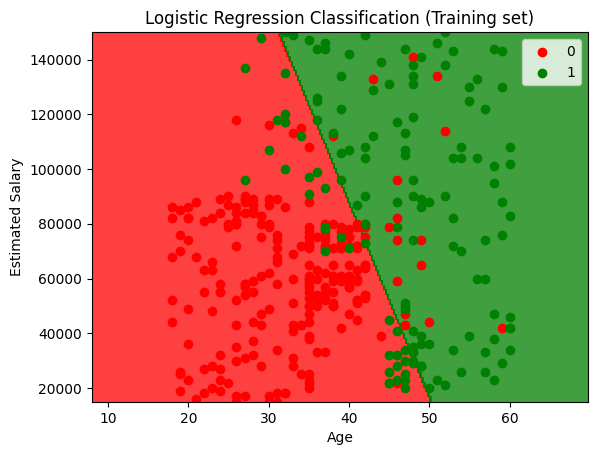

In [10]:
X_set, Y_set = sc.inverse_transform(X_train), Y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25)
)

plt.contourf(
    X1,
    X2,
    l_reg.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Logistic Regression Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### __Visualizing testing dataset__

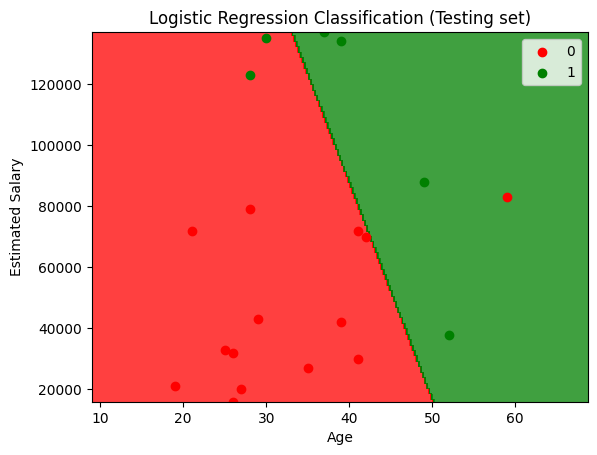

In [11]:
X_set, Y_set = sc.inverse_transform(X_test), Y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25)
)

plt.contourf(
    X1,
    X2,
    l_reg.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Logistic Regression Classification (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### __*Naive Bayes*__

In [12]:
g_nb = GaussianNB()
g_nb.fit(X_train, Y_train.values.ravel())
predict = g_nb.predict(X_test)

print("Naive Bayes Classifier\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Naive Bayes Classifier

Accuracy Score: 90.00%

Confusion Matrix:

[[13  1]
 [ 1  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.83      0.83      0.83         6

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20



#### __Visualizing training dataset__

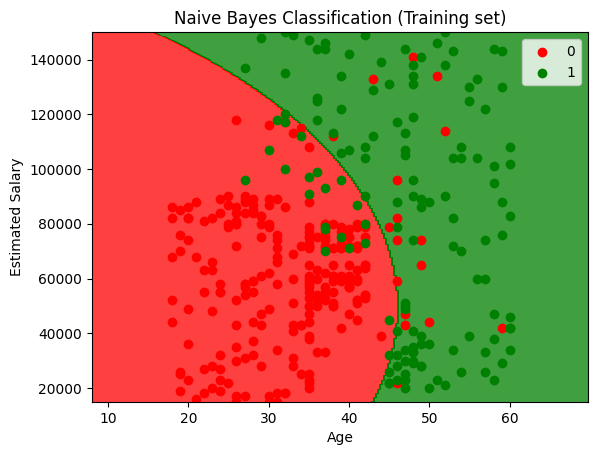

In [13]:
X_set, Y_set = sc.inverse_transform(X_train), Y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25)
)

plt.contourf(
    X1,
    X2,
    g_nb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Naive Bayes Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### __Visualizing testing dataset__

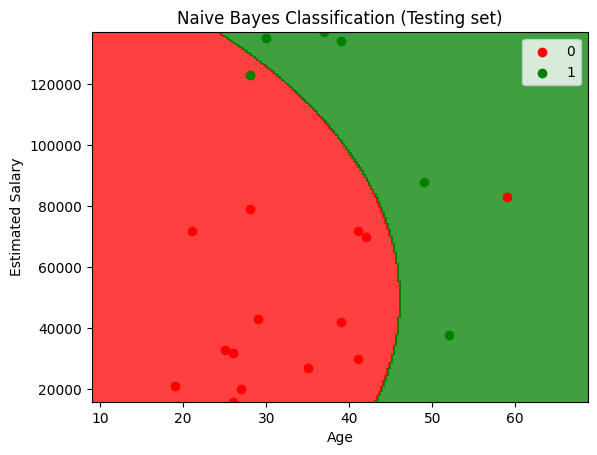

In [14]:
X_set, Y_set = sc.inverse_transform(X_test), Y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25)
)

plt.contourf(
    X1,
    X2,
    g_nb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Naive Bayes Classification (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### __*K-Nearest Neighbors*__

In [15]:
k_nn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
k_nn.fit(X_train, Y_train.values.ravel())
predict = k_nn.predict(X_test)

print("K-Nearest Neighbours\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

K-Nearest Neighbours

Accuracy Score: 95.00%

Confusion Matrix:

[[13  1]
 [ 0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20



#### __Visualizing training dataset__

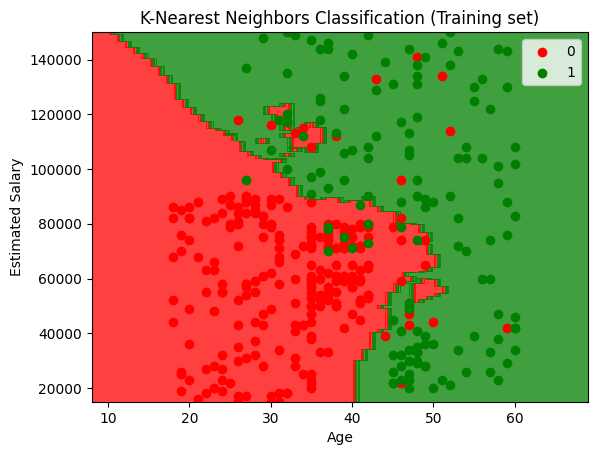

In [16]:
X_set, Y_set = sc.inverse_transform(X_train), Y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1)
)

plt.contourf(
    X1,
    X2,
    k_nn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('K-Nearest Neighbors Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### __Visualizing testing dataset__

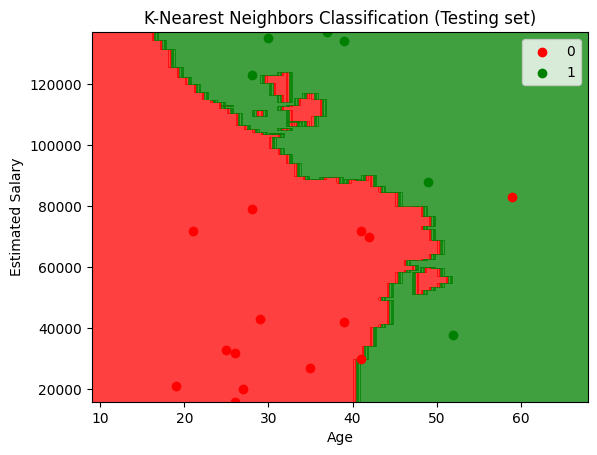

In [17]:
X_set, Y_set = sc.inverse_transform(X_test), Y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1)
)

plt.contourf(
    X1,
    X2,
    k_nn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('K-Nearest Neighbors Classification (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### __*Decision Trees*__

In [18]:
d_trees = DecisionTreeClassifier(criterion = 'entropy', random_state = 6497)
d_trees.fit(X_train, Y_train.values.ravel())
predict = d_trees.predict(X_test)

print("Decision Tree Classifier\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Decision Tree Classifier

Accuracy Score: 90.00%

Confusion Matrix:

[[12  2]
 [ 0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.75      1.00      0.86         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



#### __Visualizing training dataset__

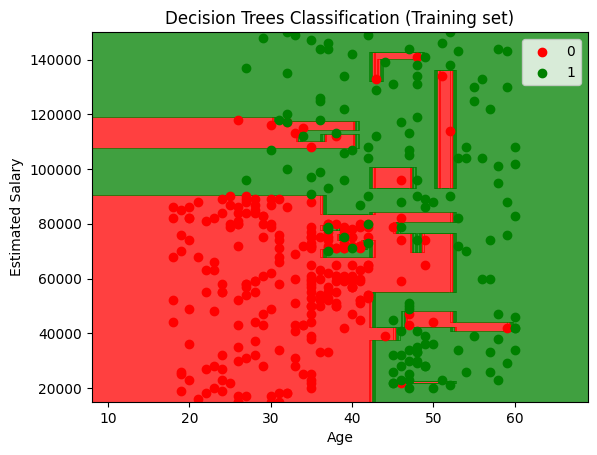

In [19]:
X_set, Y_set = sc.inverse_transform(X_train), Y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1)
)

plt.contourf(
    X1,
    X2,
    d_trees.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Decision Trees Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### __Visualizing testing dataset__

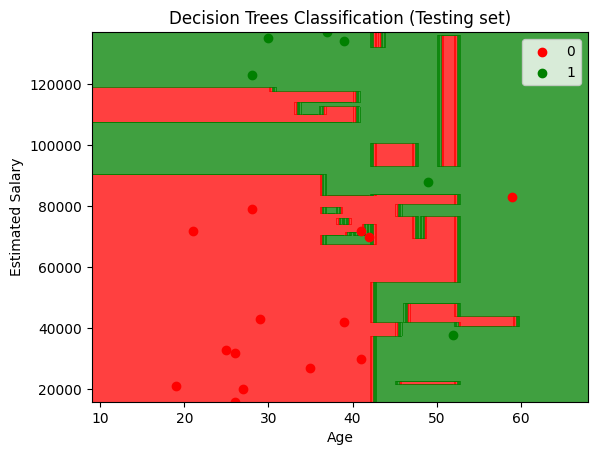

In [20]:
X_set, Y_set = sc.inverse_transform(X_test), Y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1)
)

plt.contourf(
    X1,
    X2,
    d_trees.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Decision Trees Classification (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### __*Random Forests*__

In [21]:
rand_f = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 6497)
rand_f.fit(X_train, Y_train.values.ravel())
predict = rand_f.predict(X_test)

print("Random Forst Classifier\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Random Forst Classifier

Accuracy Score: 95.00%

Confusion Matrix:

[[13  1]
 [ 0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20



#### __Visualizing training dataset__

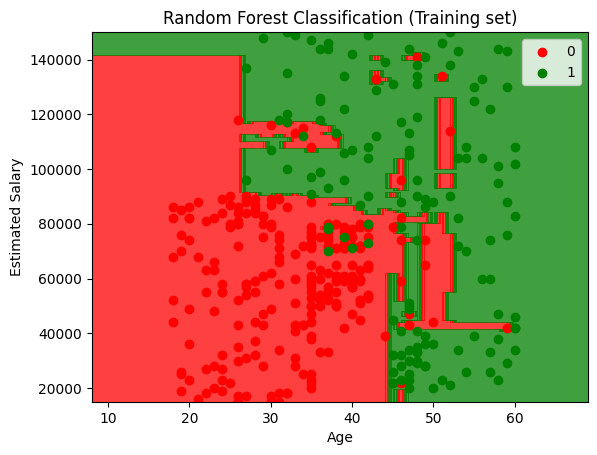

In [22]:
X_set, Y_set = sc.inverse_transform(X_train), Y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1)
)

plt.contourf(
    X1,
    X2,
    rand_f.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### __Visualizing testing dataset__

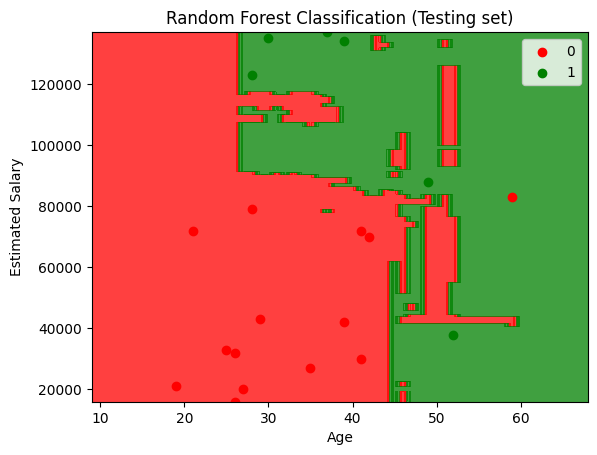

In [23]:
X_set, Y_set = sc.inverse_transform(X_test), Y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1)
)

plt.contourf(
    X1,
    X2,
    rand_f.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Random Forest Classification (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### __*Support Vector Machines*__

In [24]:
svm = SVC(kernel = 'rbf', random_state = 1)
svm.fit(X_train, Y_train.values.ravel())
predict = svm.predict(X_test)

print("Support Vector Machines\n")

print(f"Accuracy Score: {accuracy_score(predict, Y_test)*100:.2f}%\n")

'''
[ TRUE NEGATIVES] [FALSE POSITIVE]
[FALSE NEGATIVES] [ TRUE POSITIVE]
'''

cm = confusion_matrix(Y_test, predict)
print('''Confusion Matrix:\n''')
print(cm)

print(f"\nClassification Report:\n{classification_report(Y_test, predict)}")

Support Vector Machines

Accuracy Score: 95.00%

Confusion Matrix:

[[13  1]
 [ 0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20



#### __Visualizing training dataset__

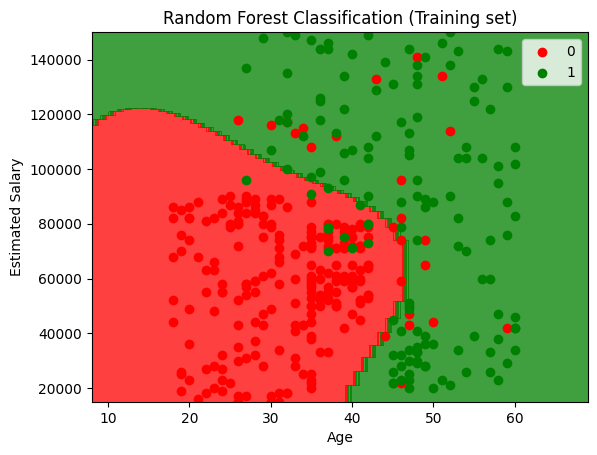

In [25]:
X_set, Y_set = sc.inverse_transform(X_train), Y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1)
)

plt.contourf(
    X1,
    X2,
    svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### __Visualizing testing dataset__

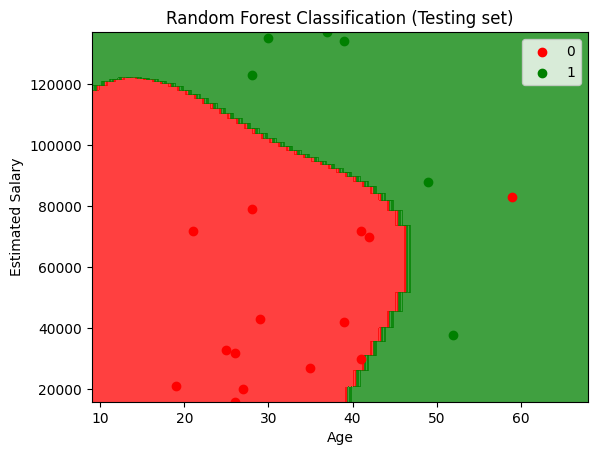

In [26]:
X_set, Y_set = sc.inverse_transform(X_test), Y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
    np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 1)
)

plt.contourf(
    X1,
    X2,
    svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set.values.flatten() == j, 0], 
                X_set[Y_set.values.flatten() == j, 1], 
                c = [ListedColormap(('red', 'green'))(i)], label = j
)

plt.title('Random Forest Classification (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()